In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 10
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.labelsize'] = 38
mpl.rcParams['ytick.labelsize'] = 38
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 30
import numpy as np

Figure 2 - Axon and Synapse Plots
--------------------------------------

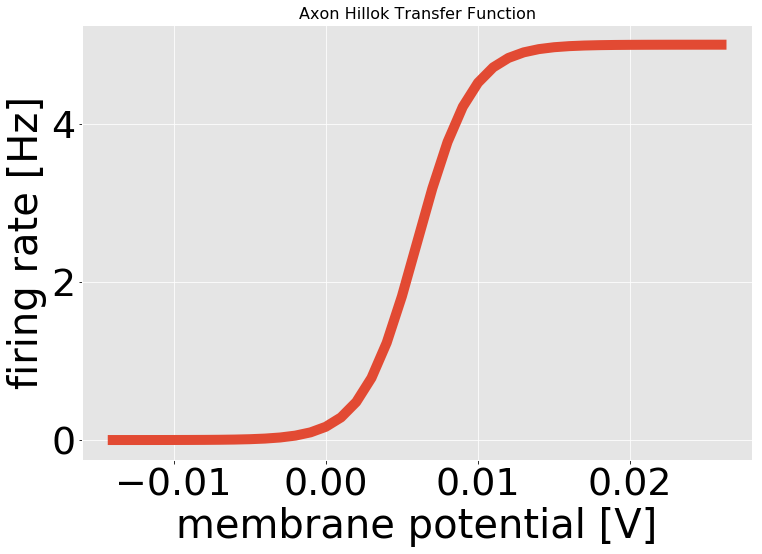

In [4]:
from pyrates.axon import JansenRitAxon

axon = JansenRitAxon()

fig, axes = plt.subplots(figsize=(12,8))
axes = axon.plot_transfer_function(create_plot=False, axes=axes)

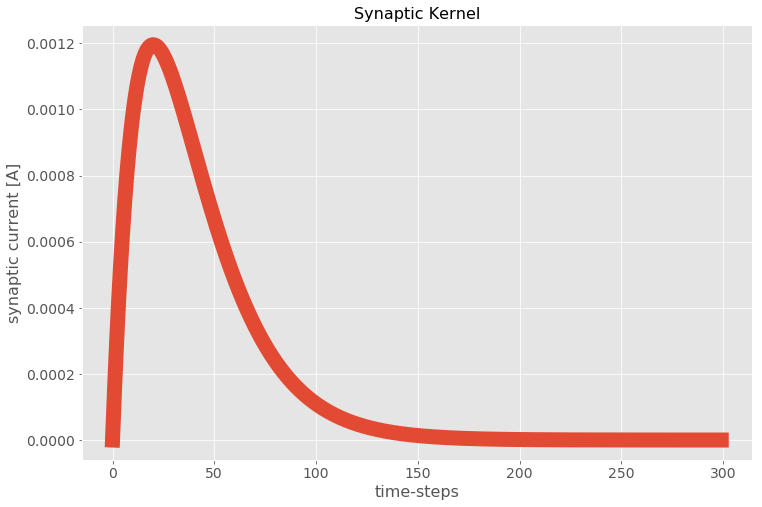

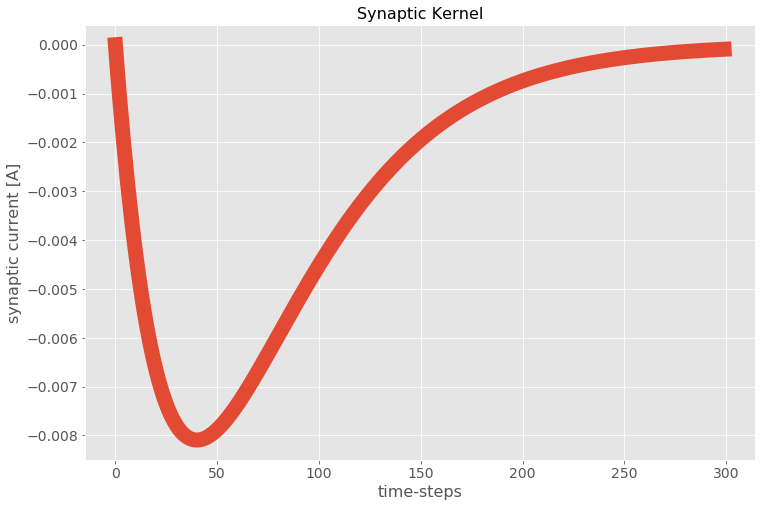

In [10]:
from core.synapse import JansenRitExcitatorySynapse, JansenRitInhibitorySynapse

synapse_e = JansenRitExcitatorySynapse(bin_size=5e-4, max_delay=0.15)
synapse_i = JansenRitInhibitorySynapse(bin_size=5e-4, max_delay=0.15)

fig, axes = plt.subplots(figsize=(12, 8))
axes = synapse_e.plot_synaptic_kernel(create_plot=False, axes=axes)
fig2, axes2 = plt.subplots(figsize=(12, 8))
axes2 = synapse_i.plot_synaptic_kernel(create_plot=False, axes=axes2)

Figure 3 - Jansen-Rit NMM Bifurcations
--------------------------------------------

In [3]:
from pyrates.circuit import JansenRitCircuit

# circuit parameters
step_size = 1e-4
init_states = np.zeros(3)

# simulation parameters
simulation_time = 10.
simulation_steps = int(simulation_time / step_size)
increase_time = 0.5
increase_steps = int(increase_time / step_size)
initial_input = 2e-3
final_input = 4e-3

# input
synaptic_input = np.zeros((simulation_steps, 3, 2))
extrinsic_current = np.zeros((simulation_steps, 3))
extrinsic_current[:, 0] = initial_input
extrinsic_current[simulation_steps-increase_steps:simulation_steps, 0] = np.linspace(initial_input, final_input, increase_steps)

# base-line
jrc = JansenRitCircuit(step_size=step_size, init_states=init_states)
jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_current)

# increased input
extrinsic_current_new = extrinsic_current.copy()
extrinsic_current_new[:, 0] = final_input
jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_current_new)

In [138]:
# increased input

extrinsic_current[:, 0] = 4e-3
extrinsic_current[0:increase_steps, 0] = np.linspace(4e-3, 2e-3, increase_steps)
jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_current)

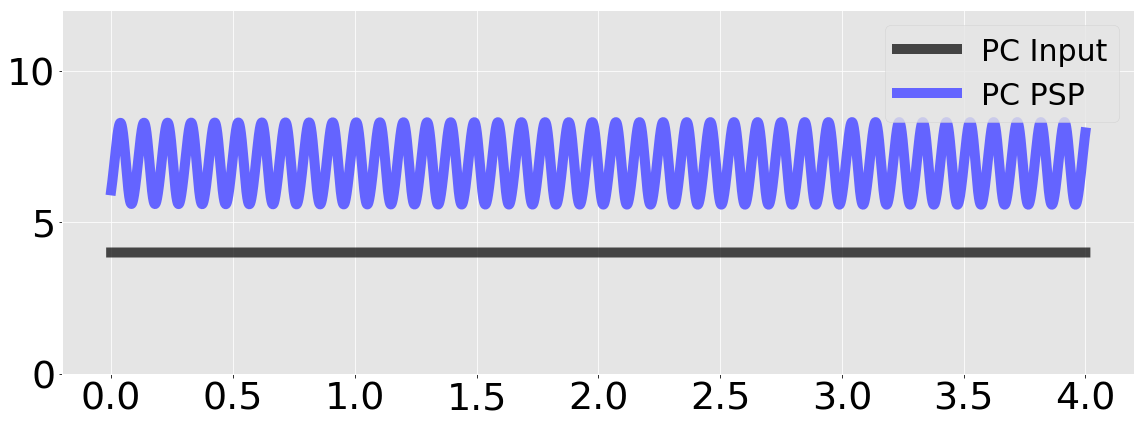

In [139]:
# plotting
plot_time = 2.
fig, axes = plt.subplots(figsize=(16,6))

inp = np.concatenate((extrinsic_current, extrinsic_current_new))
axes.plot(inp[int((simulation_time-plot_time)/step_size):int((simulation_time+plot_time)/step_size), 0], color="black", alpha=0.7)

axes = jrc.plot_population_states([0], create_plot=False, axes=axes, time_window=[simulation_time-plot_time, simulation_time+plot_time])
axes.get_lines()[-1].set_color(np.array([100, 100, 255])/255)

axes.set_ylim([.0, .012])
axes.set_xticklabels(['0.0'] + [str(t) for t in np.arange(0.0, 4.2, 0.5)])
axes.set_xlabel('')
axes.set_yticklabels(['0', '5', '10'])
axes.set_ylabel('')
plt.legend(['PC Input', 'PC PSP'])

plt.tight_layout()

Figure 4 - Alternative Modeling Choices at Axon and Synapse
-------------------------------------------------------------------


**1. Biophysical Mechanism Plots**

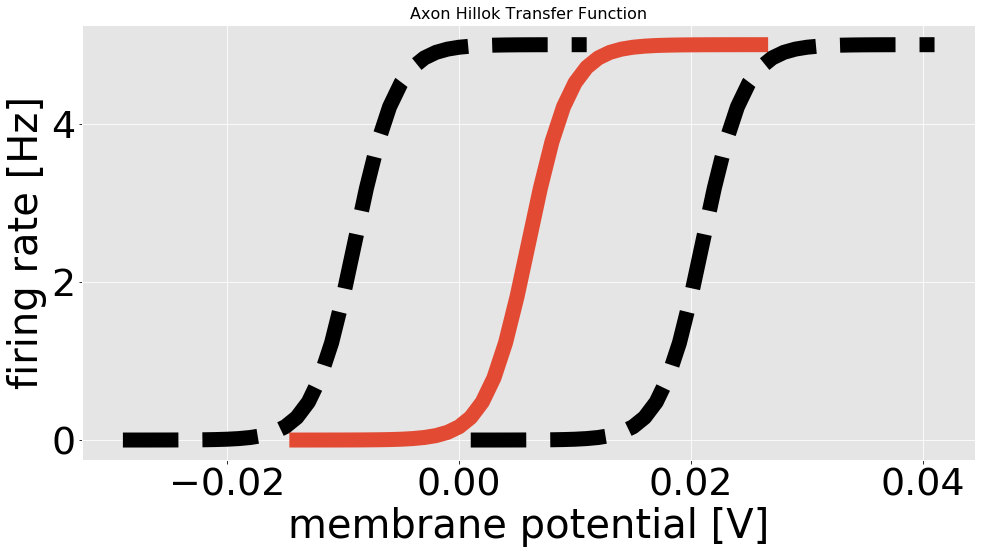

In [10]:
from core.axon import JansenRitAxon

membrane_potential_threshold = [-0.009, 0.021]
fig, axes = plt.subplots(figsize=(16,8))
axon = JansenRitAxon()
axes = axon.plot_transfer_function(create_plot=False, axes=axes)

for m in membrane_potential_threshold:
    axon.transfer_function_args['membrane_potential_threshold'] = m
    axes = axon.plot_transfer_function(create_plot=False, axes=axes)
    axes.get_lines()[-1].set_color("black")
    axes.get_lines()[-1].set_linestyle('--')

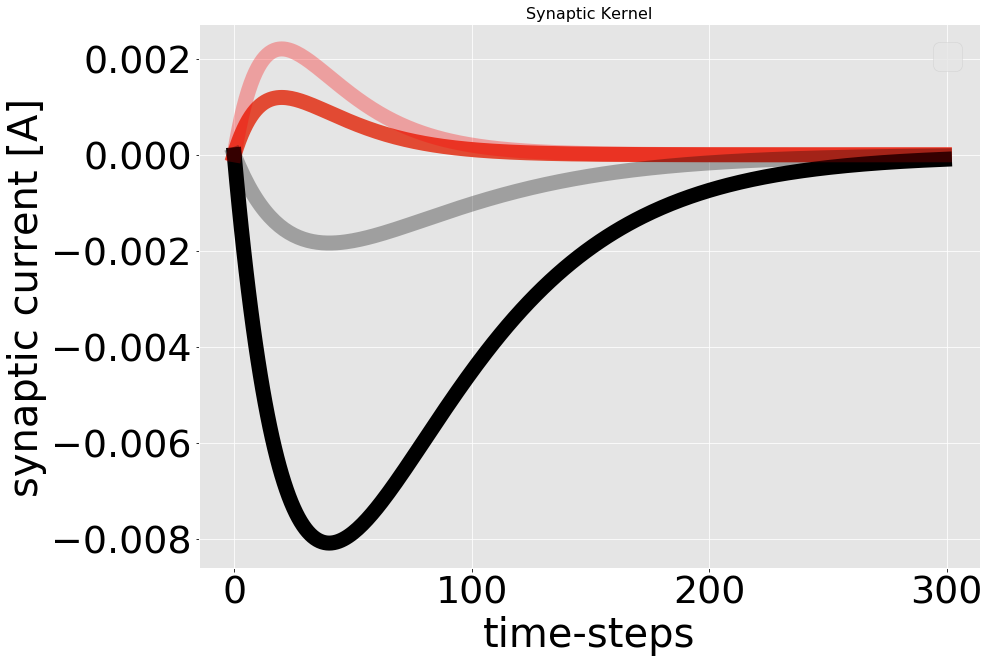

In [20]:
from core.population import JansenRitPyramidalCells

pcs = JansenRitPyramidalCells(max_synaptic_delay=0.15)
fig, axes = plt.subplots(figsize=(14,10))
axes = pcs.plot_synaptic_kernels(create_plot=False, axes=axes)
axes.get_lines()[1].set_color("black")
plt.legend('')

pcs.synapses[0].efficacy = 0.006
pcs.synapses[1].efficacy = -0.005
pcs.update()
axes = pcs.plot_synaptic_kernels(create_plot=False, axes=axes)
axes.get_lines()[2].set_color("red")
axes.get_lines()[2].set_alpha(0.3)
axes.get_lines()[3].set_color("black")
axes.get_lines()[3].set_alpha(0.3)
plt.legend('')

**2. Base Circuit Simulation Set-Up**

In [190]:
from core.circuit import JansenRitCircuit

# set parameters
################

# general
N = 3                                               # PCs, EINs, IIns
n_synapses = 2                                      # excitatory and inhibitory
step_size = 1e-4
init_states=np.zeros(N) + resting_potential

# simulation parameters
cutoff_time = 0.1
cutoff_steps = int(cutoff_time / step_size)
simulation_time = 1. + cutoff_time
simulation_steps = int(simulation_time / step_size)
input_start = int((0.2 + cutoff_time) / step_size)
input_end = int((simulation_time-0.4) / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[input_start:input_end, 0, 0] = 22. * np.random.randn(input_end-input_start) + 220.

# initialize circuit
####################

jrc = JansenRitCircuit(step_size=step_size, init_states=init_states)

# perform simulation
####################

jrc.run(synaptic_input, simulation_time)

**2.1 Base Circuit + Synaptic Rise Time**

In [159]:
from core.circuit import JansenRitLeakyCapacitorCircuit

# set parameters
################

# general
resting_potential = -0.075

# synapse parameters
synapse_params_e = {'tau_rise': 1e-20, 'tau_decay': 6e-3, 'efficacy': 1.273 * 3e-13}
synapse_params_i = {'tau_rise': 1e-20, 'rau_decay': 2e-2, 'efficacy': -1.273 * 1e-12}
synapse_params = [synapse_params_e, synapse_params_i]

# set rise time conditions
##########################

excitatory_rise = np.linspace(1e-5, 1e-3, 5)
inhibitory_rise = np.linspace(1e-5, 2e-3, 5)

# perform simulations for each rise time
########################################

jrc_rise_col = list()
for r_e, r_i in zip(excitatory_rise, inhibitory_rise):

    # synapse parameters
    synapse_params[0]['tau_rise'] = r_e
    synapse_params[1]['tau_rise'] = r_i

    # initialize circuit
    jrc_rise = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                                              synapse_params=synapse_params, resting_potential=resting_potential,
                                              init_states=init_states)

    # perform simulation
    jrc_rise.run(synaptic_input, simulation_time)
    
    # collect results
    jrc_rise_col.append(jrc_rise.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]))

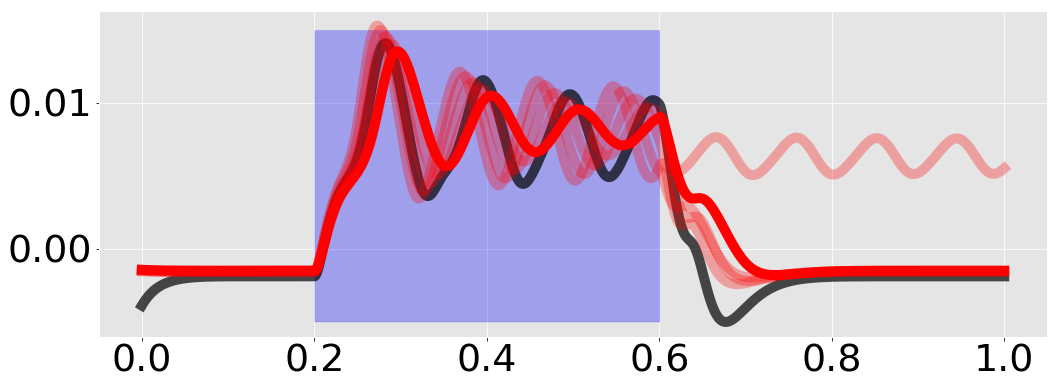

In [170]:
fig, axes = plt.subplots(figsize=(17,6))

axes.plot(jrc.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]), color="black", alpha=0.7, label="Base Circuit")
alphas = [0.3, 0.3, 0.3, 0.3, 1.0]
labels = ['', '', '', '', 'Extended Circuit']
for psps, alpha, label in zip(jrc_rise_col, alphas, labels):
    axes.plot(psps - resting_potential, 'r', alpha=alpha, label=label)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.005, 0.015, where=(steps > (input_start - cutoff_steps)) * (steps < (input_end - cutoff_steps)), color="blue", alpha=0.3, label='Input period')
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
#axes.set_yticklabels(['-5', '-5', '5', '15'])
axes.set_xlabel('')
axes.set_ylabel('')

**2.2 Base Circuit + Spike-Frequency Adaptation**

In [192]:
from core.circuit import CircuitFromScratch
from core.utility import moran_spike_frequency_adaptation

# set parameters
################

# synapses
synapses = ['JansenRitExcitatorySynapse', 'JansenRitInhibitorySynapse']
synapse_class = 'ExponentialSynapse'

# axons
axons = ['JansenRitAxon', None, 'JansenRitAxon']
axon_params = [dict(), {'max_firing_rate': 5., 'membrane_potential_threshold': -0.069, 'sigmoid_steepness': 560.}, dict()]
axon_class = ['SigmoidAxon', 'PlasticSigmoidAxon', 'SigmoidAxon']

# spike frequency adaptation
spike_frequency_adaptation = [None, moran_spike_frequency_adaptation, None]
taus = np.linspace(5.12, 0.0512, 5)

# connectivity
conn = jrc.C.copy()

# perform simulation for each spike frequency adaptation time-scale
###################################################################

jrc_sfa_col = list()
for tau in taus:
    
    # set spike-frequency adaptation
    sfa_args = [dict(), {'tau': tau}, dict()]
    
    # instantiate circuit
    jrc_sfa = CircuitFromScratch(step_size=step_size, connectivity=conn,
                                 synapses=synapses, synapse_class=synapse_class, 
                                 axon_class=axon_class, axon_params=axon_params, axons=axons,
                                 spike_frequency_adaptation=spike_frequency_adaptation, 
                                 spike_frequency_adaptation_args=sfa_args, 
                                 init_states=init_states)

    # perform simulation
    jrc_sfa.run(synaptic_input, simulation_time)
    
    # collect states
    jrc_sfa_col.append(jrc_sfa.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]))

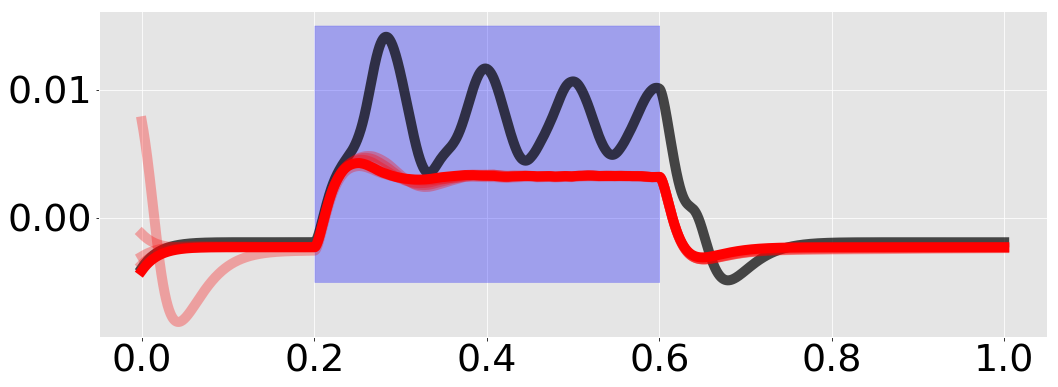

In [193]:
fig, axes = plt.subplots(figsize=(17,6))

axes.plot(jrc.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]), color="black", alpha=0.7, label="Base Circuit")
alphas = [0.3, 0.3, 0.3, 0.3, 1.0]
labels = ['', '', '', '', 'Extended Circuit']
for psps, alpha, label in zip(jrc_sfa_col, alphas, labels):
    axes.plot(psps, 'r', alpha=alpha, label=label)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.005, 0.015, where=(steps > (input_start - cutoff_steps)) * (steps < (input_end - cutoff_steps)), color="blue", alpha=0.3, label='Input period')
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
#axes.set_yticklabels(['-5', '-5', '5', '15'])
axes.set_xlabel('')
axes.set_ylabel('')

**2.3 Base Circuit + Synaptic Plasticity**

In [198]:
from core.circuit import CircuitFromScratch
from core.utility import synaptic_efficacy_adaptation

# set parameters
################

# connectivity
conn = jrc.C.copy()

# synapses
# synapses
synapses = ['JansenRitExcitatorySynapse', 'JansenRitInhibitorySynapse']
synapse_class = 'ExponentialSynapse'

# axons
axons = ['JansenRitAxon' for _ in range(N)]
axon_class = 'SigmoidAxon'

# synapse efficacy adaptation
synapse_efficacy_adaptation = [[synaptic_efficacy_adaptation, None] for _ in range(N)]
tau_depression = np.linspace(0.5, 0.005, 5)
tau_recycle = tau_depression * 10.

# perform simulation for each spike frequency adaptation time-scale
###################################################################

jrc_sea_col = list()
for t_d, t_r in zip(tau_depression, tau_recycle):
    
    # set spike-frequency adaptation
    sea_args = [[{'tau_depression': t_d, 'tau_recycle': t_r}, None] for _ in range(N)]
    
    # instantiate circuit
    jrc_sea = CircuitFromScratch(step_size=step_size, connectivity=conn,
                                 synapses=synapses, synapse_class=synapse_class,
                                 axons=axons, axon_class=axon_class, init_states=init_states,
                                 synapse_efficacy_adaptation=synapse_efficacy_adaptation,
                                 synapse_efficacy_adaptation_args=sea_args)

    # perform simulation
    jrc_sea.run(synaptic_input, simulation_time)
    
    # collect states
    jrc_sea_col.append(jrc_sea.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]))

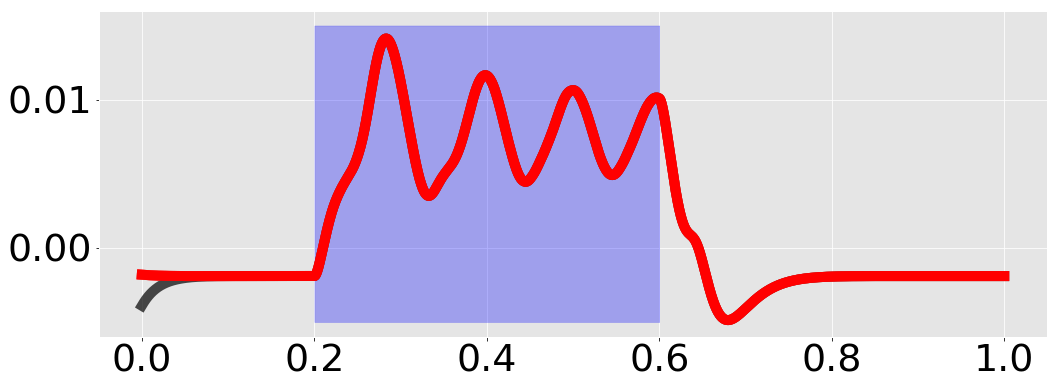

In [199]:
fig, axes = plt.subplots(figsize=(17,6))

axes.plot(jrc.get_population_states(0, [0], time_window=[cutoff_time, simulation_time]), color="black", alpha=0.7, label="Base Circuit")
alphas = [0.3, 0.3, 0.3, 0.3, 1.0]
labels = ['', '', '', '', 'Extended Circuit']
for psps, alpha, label in zip(jrc_sea_col, alphas, labels):
    axes.plot(psps, 'r', alpha=alpha, label=label)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.005, 0.015, where=(steps > (input_start - cutoff_steps)) * (steps < (input_end - cutoff_steps)), color="blue", alpha=0.3, label='Input period')
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
#axes.set_yticklabels(['-5', '-5', '5', '15'])
axes.set_xlabel('')
axes.set_ylabel('')

**2.4 Base Circuit + Conductance-Based Synapses**

In [118]:
# set parameters
################

conductance_based = True
synapse_params = [{'efficacy': 7.2e-10 * 1.273, 'reversal_potential': 0., 'tau_decay': 1e-3, 'tau_rise': 1e-20}, 
                  {'efficacy': 4e-11 * 1.358, 'reversal_potential': -0.090, 'tau_decay': 2e-2, 'tau_rise': 1e-20}]
inhibition = np.linspace(20., 40., 5) * 4e-11 * 1.358

# perform simulations for different GABAA efficacies
####################################################

jrc_conductance_col = list()
for h_i in inhibition:
    
    # set gabaa efficacy
    synapse_params[1]['efficacy'] = h_i
    
    # instantiate circuits
    jrc_conductance = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                                                     resting_potential=resting_potential, 
                                                     conductance_based=conductance_based, synapse_params=synapse_params)

    # perform simulation
    jrc_conductance.run(synaptic_input, simulation_time)
    
    # collect states
    jrc_conductance_col.append(jrc_conductance.get_population_states(0, [0]))

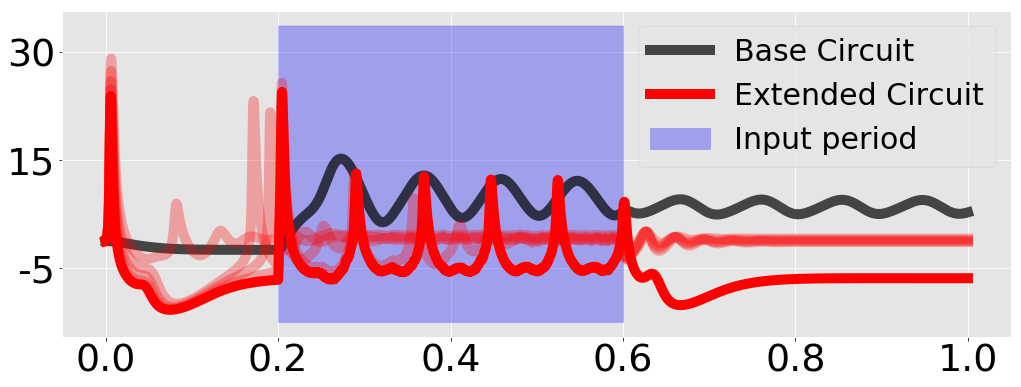

In [119]:
fig, axes = plt.subplots(figsize=(17,6))

axes = jrc.plot_population_states([0], create_plot=False, axes=axes)
alphas = [0.3, 0.3, 0.3, 0.3, 1.0]
labels = ['', '', '', '', 'Extended Circuit']
for psps, alpha, label in zip(jrc_conductance_col, alphas, labels):
    axes.plot(psps, 'r', alpha=alpha, label=label)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.09, -0.035, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3, label='Input period')
axes.get_lines()[0].set_color("black")
axes.get_lines()[0].set_alpha(0.7)
axes.get_lines()[0].set_label('Base Circuit')
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_yticklabels(['-5', '-5', '15', '30'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend()

**2.5 Base Circuit + Bursting Axon**

In [79]:
from core.circuit import CircuitFromScratch

# set parameters
################

# connectivity
connections = np.zeros((N, N, n_synapses))
c = 135.
connections[:, :, 0] = [[0., 0.8 * c, 0],         # excitatory connections
                        [1.0 * c, 0., 0],
                        [0.25 * c, 0, 0]]

connections[:, :, 1] = [[0, 0, 0.25 * c],         # inhibitory connections
                        [0, 0, 0],
                        [0, 0, 0.]]

# synapses
synapses = ['AMPACurrentSynapse', 'GABAACurrentSynapse']
synapse_types = ['AMPA', 'GABAA']
synapse_class = 'DoubleExponentialSynapse'
synapse_params_e = {'tau_rise': 1e-20, 'tau_decay': 6e-3, 'efficacy': 1.273 * 3e-13}
synapse_params_i = {'tau_rise': 1e-20, 'rau_decay': 2e-2, 'efficacy': -1.273 * 1e-12}
synapse_params = [synapse_params_e, synapse_params_i]

# axons
axons = ['SuffczynskiAxon' for _ in range(N)]
axon_class = 'BurstingAxon'
axon_params_tmp = {'bin_size': step_size,
                   'max_delay': max_synaptic_delay,
                   'tau_rise': 1/20,
                   'tau_decay': 1/10,
                   'max_firing_rate': 5.,
                   'activation_threshold': resting_potential + 0.006,
                   'activation_steepness': -0.0018,
                   'inactivation_threshold': resting_potential - 0.016,
                   'inactivation_steepness': 0.006}
inactivation_thresholds = np.linspace(0.022, -0.016, 5) + resting_potential

# perform simulation for each inactivation threshold
####################################################

jrc_burst_col = list()
for inact_thresh in inactivation_thresholds:
    
    # set inactivation threshold of axons
    axon_params_tmp['inactivation_threshold'] = inact_thresh
    axon_params = [axon_params_tmp for _ in range(N)]
    
    # instantiate circuit
    jrc_burst = CircuitFromScratch(step_size=step_size, max_synaptic_delay=max_synaptic_delay, connectivity=connections,
                                   synapses=synapses, synapse_class=synapse_class, synapse_params=synapse_params, 
                                   synapse_types=synapse_types, axons=axons, axon_class=axon_class, axon_params=axon_params,
                                   init_states=init_states, population_class='Population', 
                                   resting_potential=resting_potential)

    # perform simulation
    jrc_burst.run(synaptic_input, simulation_time)
    
    # collect states
    jrc_burst_col.append(jrc_burst.get_population_states(0, [0]))

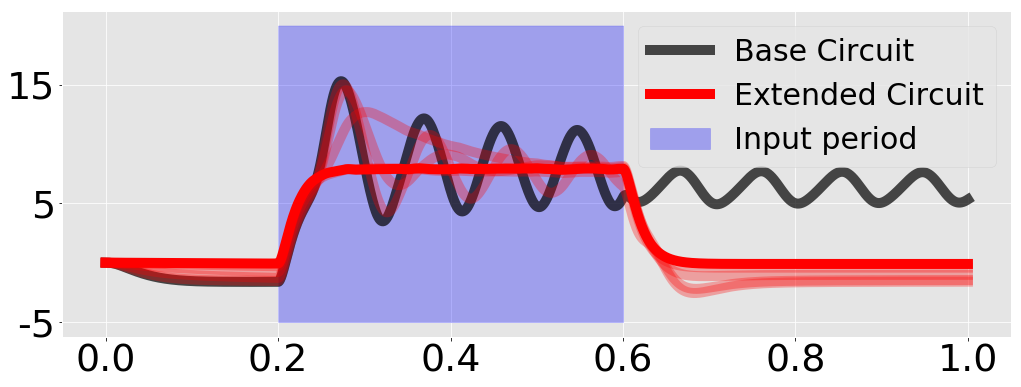

In [120]:
fig, axes = plt.subplots(figsize=(17,6))

axes = jrc.plot_population_states([0], create_plot=False, axes=axes)
alphas = [0.3, 0.3, 0.3, 0.3, 1.0]
labels = ['', '', '', '', 'Extended Circuit']
for psps, alpha, label in zip(jrc_burst_col, alphas, labels):
    axes.plot(psps, 'r', alpha=alpha, label=label)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.08, -0.055, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3, label='Input period')
axes.get_lines()[0].set_color("black")
axes.get_lines()[0].set_alpha(0.7)
axes.get_lines()[0].set_label('Base Circuit')
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_yticklabels(['-5', '-5', '5', '15'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend()